In [1]:
import numpy as np

In [2]:
def gradient_descent(thetas,X,Y,lr=0.001):
    h = 1/(1+np.exp(X.dot(thetas.T)*-1))
    thetas -= (2*(h-Y).T.dot(X)*lr)/X.shape[0]

In [3]:
def loss_hesapla(thetas,X,Y):
    g = X.dot(thetas.T)
    h = 1/(1+np.exp(g*-1))
    return np.sum((Y.T.dot(np.log(h)) + (1-Y.T).dot(np.log(1-h)))/(X.shape[0]*-1))

In [4]:
def accuracy(thetas,X,Y):
    tahminler = np.zeros((X.shape[0],1))
    tahminler[X.dot(thetas.T) >= 0.5] = 1.0
    acc = 100*(tahminler == cikti).sum()/X.shape[0]
    return acc

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
veriler = pd.read_csv(r"veriler.csv")

In [7]:
veriler.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [8]:
ss = StandardScaler()

In [9]:
boy = ss.fit_transform(veriler[["boy"]])
boy

array([[-1.62018668],
       [-1.86299395],
       [-1.37737941],
       [-1.47450232],
       [-1.66874813],
       [ 0.807886  ],
       [ 1.29350054],
       [ 0.56507873],
       [ 0.66220164],
       [ 1.05069327],
       [ 0.0794642 ],
       [-0.40615034],
       [-0.16334307],
       [-0.06622016],
       [ 0.1765871 ],
       [ 0.51651728],
       [ 1.4391849 ],
       [ 1.14781618],
       [ 0.95357036],
       [-0.21190452],
       [ 0.03090274],
       [ 0.12802565]])

In [10]:
kilo = ss.fit_transform(veriler[["kilo"]])
kilo

array([[-1.47588873],
       [-1.20033383],
       [-1.29218547],
       [-1.47588873],
       [-1.1084822 ],
       [ 1.27966024],
       [ 0.82040208],
       [ 1.27966024],
       [-0.09811424],
       [ 1.96854749],
       [-0.32774333],
       [-0.55737241],
       [-0.18996588],
       [-0.14404006],
       [-0.00626261],
       [ 0.36114392],
       [ 1.27966024],
       [ 0.82040208],
       [ 1.18780861],
       [-1.01663057],
       [ 0.17744065],
       [-0.28181751]])

In [11]:
yas = ss.fit_transform(veriler[["yas"]])
yas

array([[-1.47217295],
       [-1.39337051],
       [-1.47217295],
       [-1.5509754 ],
       [-1.31456806],
       [ 0.10387595],
       [-0.29013628],
       [ 0.49788818],
       [-0.52654361],
       [ 0.34028329],
       [-0.13253139],
       [ 1.20711018],
       [ 0.81309796],
       [ 0.97070285],
       [ 2.07393708],
       [ 1.44351752],
       [-0.44774117],
       [-0.13253139],
       [-0.05372894],
       [ 0.02507351],
       [ 0.26148084],
       [ 1.04950529]])

In [12]:
ohe = OneHotEncoder()

In [13]:
ulkeler = ohe.fit_transform(veriler[["ulke"]]).toarray()
ulkeler

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [14]:
cinsiyet = ohe.fit_transform(veriler[["cinsiyet"]]).toarray()[:,0].reshape((veriler.shape[0],1))
cinsiyet

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [15]:
girdiler = np.concatenate([ulkeler,boy,kilo,yas],axis=1)
girdiler

array([[ 0.        ,  1.        ,  0.        , -1.62018668, -1.47588873,
        -1.47217295],
       [ 0.        ,  1.        ,  0.        , -1.86299395, -1.20033383,
        -1.39337051],
       [ 0.        ,  1.        ,  0.        , -1.37737941, -1.29218547,
        -1.47217295],
       [ 0.        ,  1.        ,  0.        , -1.47450232, -1.47588873,
        -1.5509754 ],
       [ 0.        ,  1.        ,  0.        , -1.66874813, -1.1084822 ,
        -1.31456806],
       [ 0.        ,  1.        ,  0.        ,  0.807886  ,  1.27966024,
         0.10387595],
       [ 0.        ,  1.        ,  0.        ,  1.29350054,  0.82040208,
        -0.29013628],
       [ 0.        ,  1.        ,  0.        ,  0.56507873,  1.27966024,
         0.49788818],
       [ 0.        ,  1.        ,  0.        ,  0.66220164, -0.09811424,
        -0.52654361],
       [ 0.        ,  0.        ,  1.        ,  1.05069327,  1.96854749,
         0.34028329],
       [ 0.        ,  0.        ,  1.        ,  0.

In [16]:
cikti = cinsiyet
cikti

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [17]:
X = np.concatenate([np.ones((girdiler.shape[0],1)),girdiler],axis=1)
X

array([[ 1.        ,  0.        ,  1.        ,  0.        , -1.62018668,
        -1.47588873, -1.47217295],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.86299395,
        -1.20033383, -1.39337051],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.37737941,
        -1.29218547, -1.47217295],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.47450232,
        -1.47588873, -1.5509754 ],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.66874813,
        -1.1084822 , -1.31456806],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.807886  ,
         1.27966024,  0.10387595],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  1.29350054,
         0.82040208, -0.29013628],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.56507873,
         1.27966024,  0.49788818],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.66220164,
        -0.09811424, -0.52654361],
       [ 1.        ,  0.    

In [18]:
thetas = np.random.rand(1,girdiler.shape[1]+1)
thetas

array([[0.82894443, 0.88658016, 0.99274033, 0.60752215, 0.62894499,
        0.24630544, 0.221781  ]])

In [19]:
iterasyon = 50000
loss_list = list()

In [20]:
for i in range(iterasyon):
    gradient_descent(thetas,X,cikti,lr=0.001)
    loss_list.append(loss_hesapla(thetas,X,cikti))
    if(i%100 == 0):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla(thetas,X,cikti)))

0.iterasyon, Loss = 0.9398445115138151
100.iterasyon, Loss = 0.9007791142099176
200.iterasyon, Loss = 0.8639585938988611
300.iterasyon, Loss = 0.8294250663281065
400.iterasyon, Loss = 0.7971926401165916
500.iterasyon, Loss = 0.767246432160303
600.iterasyon, Loss = 0.7395433490740622
700.iterasyon, Loss = 0.714014504456068
800.iterasyon, Loss = 0.6905689458543605
900.iterasyon, Loss = 0.6690982379142034
1000.iterasyon, Loss = 0.6494814084765081
1100.iterasyon, Loss = 0.6315898066920252
1200.iterasyon, Loss = 0.6152915220278026
1300.iterasyon, Loss = 0.6004551383538865
1400.iterasyon, Loss = 0.5869527193267348
1500.iterasyon, Loss = 0.5746620209008548
1600.iterasyon, Loss = 0.5634679958378908
1700.iterasyon, Loss = 0.5532636940864806
1800.iterasyon, Loss = 0.543950677502419
1900.iterasyon, Loss = 0.5354390649688198
2000.iterasyon, Loss = 0.5276473115256931
2100.iterasyon, Loss = 0.520501808086359
2200.iterasyon, Loss = 0.5139363704176184
2300.iterasyon, Loss = 0.5078916694801254
2400.ite

22900.iterasyon, Loss = 0.33603646606361254
23000.iterasyon, Loss = 0.33574664793801046
23100.iterasyon, Loss = 0.335458126323166
23200.iterasyon, Loss = 0.3351708929924691
23300.iterasyon, Loss = 0.3348849397991509
23400.iterasyon, Loss = 0.33460025867483084
23500.iterasyon, Loss = 0.33431684162810454
23600.iterasyon, Loss = 0.33403468074317055
23700.iterasyon, Loss = 0.333753768178495
23800.iterasyon, Loss = 0.33347409616551293
23900.iterasyon, Loss = 0.3331956570073654
24000.iterasyon, Loss = 0.33291844307767104
24100.iterasyon, Loss = 0.3326424468193302
24200.iterasyon, Loss = 0.3323676607433621
24300.iterasyon, Loss = 0.33209407742777225
24400.iterasyon, Loss = 0.33182168951645163
24500.iterasyon, Loss = 0.33155048971810336
24600.iterasyon, Loss = 0.33128047080519885
24700.iterasyon, Loss = 0.33101162561296077
24800.iterasyon, Loss = 0.3307439470383734
24900.iterasyon, Loss = 0.3304774280392176
25000.iterasyon, Loss = 0.3302120616331318
25100.iterasyon, Loss = 0.3299478408966964
2

42000.iterasyon, Loss = 0.2975107322501835
42100.iterasyon, Loss = 0.29737210202117975
42200.iterasyon, Loss = 0.2972339297856154
42300.iterasyon, Loss = 0.2970962133082196
42400.iterasyon, Loss = 0.2969589503669478
42500.iterasyon, Loss = 0.2968221387528963
42600.iterasyon, Loss = 0.2966857762702166
42700.iterasyon, Loss = 0.296549860736031
42800.iterasyon, Loss = 0.2964143899803489
42900.iterasyon, Loss = 0.29627936184598275
43000.iterasyon, Loss = 0.2961447741884657
43100.iterasyon, Loss = 0.2960106248759692
43200.iterasyon, Loss = 0.29587691178922076
43300.iterasyon, Loss = 0.29574363282142374
43400.iterasyon, Loss = 0.2956107858781758
43500.iterasyon, Loss = 0.29547836887738943
43600.iterasyon, Loss = 0.29534637974921185
43700.iterasyon, Loss = 0.29521481643594655
43800.iterasyon, Loss = 0.2950836768919747
43900.iterasyon, Loss = 0.294952959083677
44000.iterasyon, Loss = 0.2948226609893563
44100.iterasyon, Loss = 0.29469278059916104
44200.iterasyon, Loss = 0.29456331591500867
4430

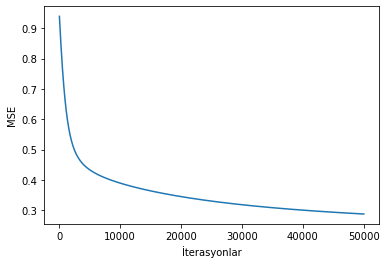

In [21]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(loss_list)+1),loss_list)
plt.xlabel("İterasyonlar")
plt.ylabel("MSE")
plt.show()

In [22]:
indis = 11

In [23]:
print("Gercek = {0}, Tahmin = {1}".format(cikti[indis],(1/(1+np.exp(X[indis].dot(thetas.T)*-1)))))

Gercek = [0.], Tahmin = [0.01758354]


In [24]:
accuracy(thetas,X,cikti)

86.36363636363636

# <------------>

In [25]:
X

array([[ 1.        ,  0.        ,  1.        ,  0.        , -1.62018668,
        -1.47588873, -1.47217295],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.86299395,
        -1.20033383, -1.39337051],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.37737941,
        -1.29218547, -1.47217295],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.47450232,
        -1.47588873, -1.5509754 ],
       [ 1.        ,  0.        ,  1.        ,  0.        , -1.66874813,
        -1.1084822 , -1.31456806],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.807886  ,
         1.27966024,  0.10387595],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  1.29350054,
         0.82040208, -0.29013628],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.56507873,
         1.27966024,  0.49788818],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.66220164,
        -0.09811424, -0.52654361],
       [ 1.        ,  0.    

In [26]:
X_new = X[:,[0,4,5]]
X_new

array([[ 1.        , -1.62018668, -1.47588873],
       [ 1.        , -1.86299395, -1.20033383],
       [ 1.        , -1.37737941, -1.29218547],
       [ 1.        , -1.47450232, -1.47588873],
       [ 1.        , -1.66874813, -1.1084822 ],
       [ 1.        ,  0.807886  ,  1.27966024],
       [ 1.        ,  1.29350054,  0.82040208],
       [ 1.        ,  0.56507873,  1.27966024],
       [ 1.        ,  0.66220164, -0.09811424],
       [ 1.        ,  1.05069327,  1.96854749],
       [ 1.        ,  0.0794642 , -0.32774333],
       [ 1.        , -0.40615034, -0.55737241],
       [ 1.        , -0.16334307, -0.18996588],
       [ 1.        , -0.06622016, -0.14404006],
       [ 1.        ,  0.1765871 , -0.00626261],
       [ 1.        ,  0.51651728,  0.36114392],
       [ 1.        ,  1.4391849 ,  1.27966024],
       [ 1.        ,  1.14781618,  0.82040208],
       [ 1.        ,  0.95357036,  1.18780861],
       [ 1.        , -0.21190452, -1.01663057],
       [ 1.        ,  0.03090274,  0.177

In [27]:
thetas = np.random.rand(1,X_new.shape[1])
thetas

array([[0.85581674, 0.75281493, 0.72769149]])

In [28]:
iterasyon = 50000
loss_list = list()

In [29]:
for i in range(iterasyon):
    gradient_descent(thetas,X_new,cikti,lr=0.001)
    loss_list.append(loss_hesapla(thetas,X_new,cikti))
    if(i%100 == 0):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla(thetas,X_new,cikti)))

0.iterasyon, Loss = 0.7260974064679165
100.iterasyon, Loss = 0.7176725690827793
200.iterasyon, Loss = 0.7096338346271147
300.iterasyon, Loss = 0.7019722426559625
400.iterasyon, Loss = 0.694677995834668
500.iterasyon, Loss = 0.6877405380943317
600.iterasyon, Loss = 0.6811486408922188
700.iterasyon, Loss = 0.6748904957996529
800.iterasyon, Loss = 0.6689538115078357
900.iterasyon, Loss = 0.6633259132835131
1000.iterasyon, Loss = 0.6579938429212804
1100.iterasyon, Loss = 0.6529444573232084
1200.iterasyon, Loss = 0.6481645239812509
1300.iterasyon, Loss = 0.6436408118326621
1400.iterasyon, Loss = 0.6393601761905727
1500.iterasyon, Loss = 0.6353096367073738
1600.iterasyon, Loss = 0.6314764475942055
1700.iterasyon, Loss = 0.6278481595832665
1800.iterasyon, Loss = 0.6244126733701457
1900.iterasyon, Loss = 0.6211582845023734
2000.iterasyon, Loss = 0.618073719881605
2100.iterasyon, Loss = 0.6151481662163876
2200.iterasyon, Loss = 0.6123712908985125
2300.iterasyon, Loss = 0.6097332558786389
2400.i

20600.iterasyon, Loss = 0.4806017161871184
20700.iterasyon, Loss = 0.48028155462246375
20800.iterasyon, Loss = 0.4799631487954957
20900.iterasyon, Loss = 0.4796464852648357
21000.iterasyon, Loss = 0.4793315507183966
21100.iterasyon, Loss = 0.4790183319719316
21200.iterasyon, Loss = 0.47870681596760484
21300.iterasyon, Loss = 0.47839698977257716
21400.iterasyon, Loss = 0.4780888405776105
21500.iterasyon, Loss = 0.47778235569569066
21600.iterasyon, Loss = 0.4774775225606657
21700.iterasyon, Loss = 0.47717432872590315
21800.iterasyon, Loss = 0.4768727618629611
21900.iterasyon, Loss = 0.47657280976027894
22000.iterasyon, Loss = 0.47627446032188253
22100.iterasyon, Loss = 0.4759777015661051
22200.iterasyon, Loss = 0.47568252162432484
22300.iterasyon, Loss = 0.47538890873971806
22400.iterasyon, Loss = 0.4750968512660267
22500.iterasyon, Loss = 0.47480633766634156
22600.iterasyon, Loss = 0.4745173565119007
22700.iterasyon, Loss = 0.47422989648090236
22800.iterasyon, Loss = 0.4739439463573319


39900.iterasyon, Loss = 0.4405363338739505
40000.iterasyon, Loss = 0.4404039449946992
40100.iterasyon, Loss = 0.44027206359837606
40200.iterasyon, Loss = 0.440140686964386
40300.iterasyon, Loss = 0.44000981239116754
40400.iterasyon, Loss = 0.43987943719603034
40500.iterasyon, Loss = 0.43974955871499366
40600.iterasyon, Loss = 0.4396201743026264
40700.iterasyon, Loss = 0.4394912813318888
40800.iterasyon, Loss = 0.43936287719397593
40900.iterasyon, Loss = 0.43923495929816203
41000.iterasyon, Loss = 0.43910752507164763
41100.iterasyon, Loss = 0.43898057195940693
41200.iterasyon, Loss = 0.4388540974240378
41300.iterasyon, Loss = 0.43872809894561227
41400.iterasyon, Loss = 0.4386025740215288
41500.iterasyon, Loss = 0.4384775201663667
41600.iterasyon, Loss = 0.438352934911741
41700.iterasyon, Loss = 0.4382288158061598
41800.iterasyon, Loss = 0.43810516041488123
41900.iterasyon, Loss = 0.4379819663197743
42000.iterasyon, Loss = 0.4378592311191791
42100.iterasyon, Loss = 0.4377369524277693
422

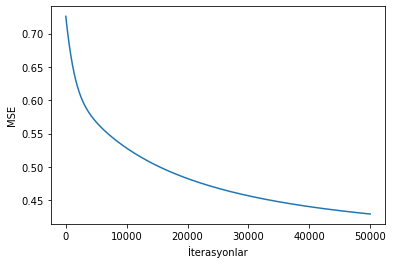

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(loss_list)+1),loss_list)
plt.xlabel("İterasyonlar")
plt.ylabel("MSE")
plt.show()

In [32]:
x_values = [-2, 2]
y_values = - (thetas[0,0] + np.dot(thetas[0,1], x_values)) / thetas[0,2]

In [33]:
y_values

array([-1.38640881,  1.29882927])

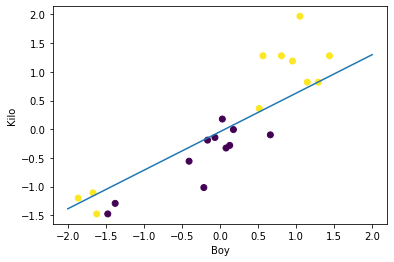

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:,1],X_new[:,2],c=cikti)
plt.plot(x_values,y_values)
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

In [35]:
accuracy(thetas,X_new,cikti)

68.18181818181819

# Logistic Regresyon Cost Fonksiyonu Conveks mi ?

In [70]:
veriler.head()

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e


In [71]:
girdi = veriler[["yas"]]
girdi = np.concatenate([np.ones((girdi.shape[0],1)),girdi],axis=1)

In [72]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cikti = ohe.fit_transform(veriler[["cinsiyet"]]).toarray()[:,0:1]

In [73]:
thetas = np.random.randn(1,girdi.shape[1])
thetas

array([[ 0.59508929, -0.89346572]])

In [74]:
iterasyon = 100000
loss_list = list()
thetas_list = list()

In [75]:
for i in range(iterasyon):
    gradient_descent(thetas,girdi,cikti,lr=0.001)  
    if(i%1000 == 0 and not i==0):
        print("{0}.iterasyon, Loss = {1}".format(i,loss_hesapla(thetas,girdi,cikti)))
        thetas_list.append(thetas[0])
        loss_list.append(loss_hesapla(thetas,girdi,cikti))

1000.iterasyon, Loss = 0.6666109379792666
2000.iterasyon, Loss = 0.665941578369427
3000.iterasyon, Loss = 0.6653685856215987
4000.iterasyon, Loss = 0.6648777463132348
5000.iterasyon, Loss = 0.6644570015027973
6000.iterasyon, Loss = 0.6640961112039172
7000.iterasyon, Loss = 0.6637863721681335
8000.iterasyon, Loss = 0.6635203805002725
9000.iterasyon, Loss = 0.6632918319196965
10000.iterasyon, Loss = 0.6630953536044701
11000.iterasyon, Loss = 0.6629263625218678
12000.iterasyon, Loss = 0.6627809459715321
13000.iterasyon, Loss = 0.6626557607633271
14000.iterasyon, Loss = 0.6625479480371808
15000.iterasyon, Loss = 0.6624550612227322
16000.iterasyon, Loss = 0.6623750050467042
17000.iterasyon, Loss = 0.6623059838382314
18000.iterasyon, Loss = 0.6622464576678315
19000.iterasyon, Loss = 0.6621951050936462
20000.iterasyon, Loss = 0.6621507914869074
21000.iterasyon, Loss = 0.6621125420739622
22000.iterasyon, Loss = 0.6620795189701538
23000.iterasyon, Loss = 0.66205100159605
24000.iterasyon, Loss =

In [76]:
thetas

array([[ 1.17158926, -0.04086407]])

In [77]:
theta_0 = np.array([x[0] for x in thetas_list])
theta_1 = np.array([x[1] for x in thetas_list])
J_history = np.array(loss_list)

In [78]:
J_history.shape

(99,)

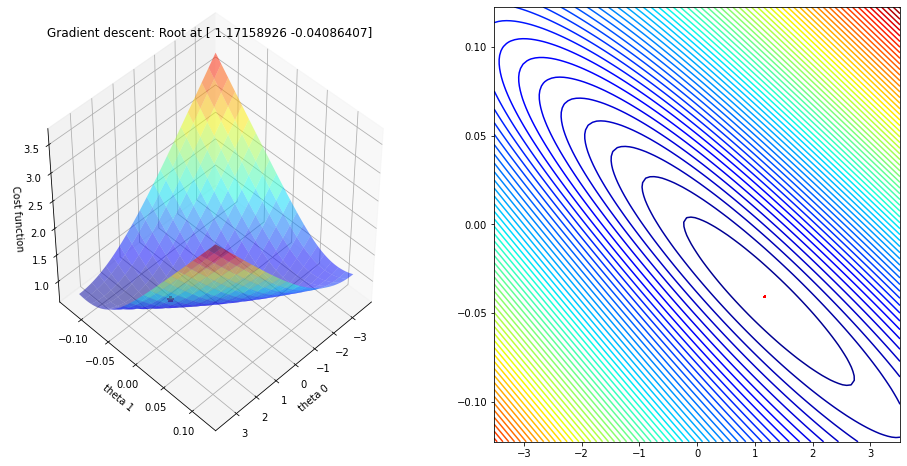

In [79]:
T0, T1 = np.meshgrid(np.linspace(thetas[0,0]*-3,thetas[0,0]*3,100),
                     np.linspace(thetas[0,1]*-3,thetas[0,1]*3,100))
z_temp = np.array([loss_hesapla(np.array([[t0,t1]]),girdi,cikti) for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])
Z = z_temp.reshape(T0.shape)

anglesx = np.array(theta_0)[1:] - np.array(theta_0)[:-1]
anglesy = np.array(theta_1)[1:] - np.array(theta_1)[:-1]

%matplotlib inline
fig = plt.figure(figsize = (16,8))

#Surface plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
ax.plot(theta_0,theta_1,J_history, marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost function')
ax.set_title('Gradient descent: Root at {}'.format(thetas.ravel()))
ax.view_init(45, 45)

ax = fig.add_subplot(1, 2, 2)
ax.contour(T0, T1, Z, 70, cmap = 'jet')
ax.quiver(theta_0[:-1], theta_1[:-1], anglesx, anglesy, scale_units = 'xy', angles = 'xy', scale = 1, color = 'r', alpha = .9)

plt.show()